In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get data

In [2]:
df = pd.read_csv("../data/claned_data.csv")

In [3]:
df.head()

,Unnamed: 0,amt,gender,category,is_fraud
0,10179,92.15,M,gas_transport,0
1,1183464,54.71,M,food_dining,0
2,841996,1.83,F,shopping_pos,0
3,1269333,63.55,M,grocery_pos,0
4,1116233,11.77,F,health_fitness,0


In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True)

# prepare data for Training

In [5]:
## Categorical encoding
from sklearn.preprocessing import LabelEncoder
lable_enc = LabelEncoder()
df["gender"] = lable_enc.fit_transform(df["gender"])
df["category"] = lable_enc.fit_transform(df["category"])

In [6]:
## Feature scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()
df["amt"] = min_max_scale.fit_transform(df[["amt"]])

In [7]:
df.head()

,amt,gender,category,is_fraud
0,0.006138,1,2,0
1,0.003616,1,1,0
2,0.000055,0,12,0
3,0.004212,1,4,0
4,0.000725,0,5,0


## Training Models

In [8]:
from  sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,ConfusionMatrixDisplay,recall_score

In [10]:
y = df["is_fraud"]
x = df.drop(columns=["is_fraud"])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
models = {
    "logistic_model" : LogisticRegression(),
    "svm_model" : SVC(),
    "decisionTree_model" : DecisionTreeClassifier(),
    "RandomForest_model" : RandomForestClassifier()
}

In [13]:
for i in models.keys():
    models[i].fit(x_train,y_train)

In [28]:
for i in models.keys():
    print(i,"performence :")
    y_predict = models[i].predict(x_test)
    print(recall_score(y_test,y_predict))

logistic_model performence :
0.7191370355573312
svm_model performence :
0.564522572912505
decisionTree_model performence :
0.9480623252097483
RandomForest_model performence :
0.9576508190171794


logistic_model performence :


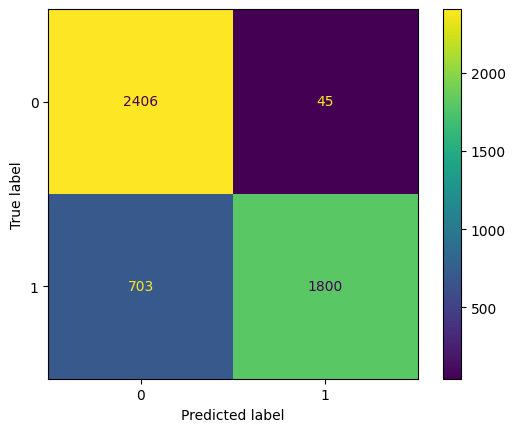

-----------------------------
svm_model performence :


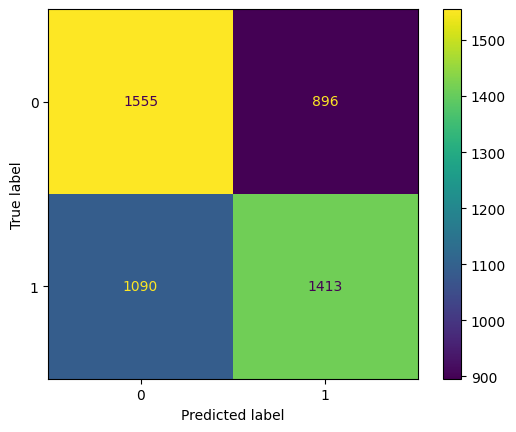

-----------------------------
decisionTree_model performence :


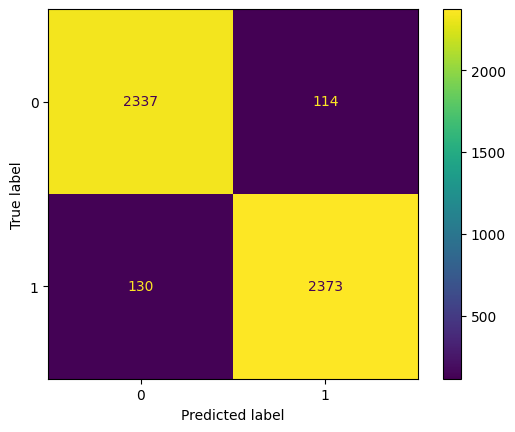

-----------------------------
RandomForest_model performence :


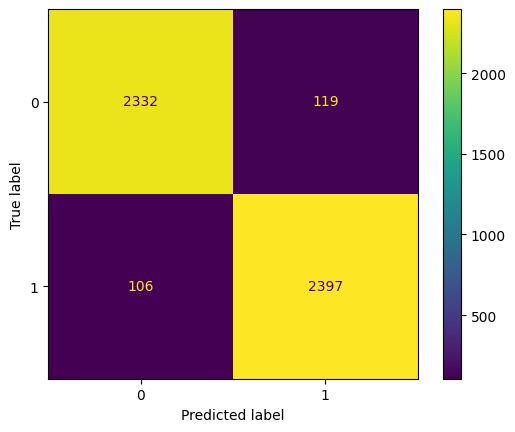

-----------------------------


In [26]:
for i in models.keys():
    print(i,"performence :")
    y_predict = models[i].predict(x_test)
    cm = confusion_matrix(y_test,y_predict)
    dm = ConfusionMatrixDisplay(cm)
    dm.plot()
    plt.show()
    print("-----------------------------")

In [33]:
model = models.get("RandomForest_model")

In [35]:
import joblib
model_saved_path = "../models/Fraud_detection_model.pkl"
joblib.dump(model,model_saved_path)

['../models/Fraud_detection_model.pkl']